# Loading Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import seaborn as sns
from tqdm import tqdm  # Import tqdm for the progress bar
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load the data

First, I'll load the parameter wave for the filtered dataset. This comes from a 2% OS filtering and a 50% OVP threshold.

In [2]:
file = 'allParamsF1Sorted.csv'
df = pd.read_csv(file)
df

,energy,os,wid,mu_x,mu_y,mu_z,theta,sym,xx,yy,zz,xy,xz,yz,atom,mo,cluster
0,283.88672,0.002326,0.254777,0.007556,0.007556,0.999943,0.612298,1,1.330000e-07,1.330000e-07,2.325637e-03,0,0,0,7,117,0
1,283.96484,0.002679,0.254777,0.013301,0.013301,0.999823,1.077745,1,4.740000e-07,4.740000e-07,2.677624e-03,0,0,0,10,117,0
2,283.98047,0.002534,0.254777,0.019405,0.019405,0.999623,1.572590,1,9.540000e-07,9.540000e-07,2.532303e-03,0,0,0,2,117,0
3,284.03125,0.002780,0.254777,0.007760,0.007760,0.999940,0.628696,1,1.670000e-07,1.670000e-07,2.780214e-03,0,0,0,15,117,0
4,284.05859,0.002178,0.254777,0.017259,0.017259,0.999702,1.398578,1,6.490000e-07,6.490000e-07,2.176943e-03,0,0,0,5,117,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3009,318.06573,0.000277,5.038846,0.700329,0.700329,0.138125,82.060608,1,1.358820e-04,1.358820e-04,5.290000e-06,0,0,0,10,475,16
3010,318.09586,0.000258,5.046615,0.265116,0.265116,0.927053,22.020010,1,1.810000e-05,1.810000e-05,2.215860e-04,0,0,0,8,466,16
3011,318.13855,0.000714,5.053938,0.706057,0.706057,0.054481,86.876900,1,3.559220e-04,3.559220e-04,2.120000e-06,0,0,0,8,467,16
3012,318.20026,0.000841,5.056222,0.706287,0.706287,0.048147,87.240288,1,4.194840e-04,4.194840e-04,1.950000e-06,0,0,0,2,475,16


Next, I'll load the OVP matrix after the 2% OS filtering has been applied

Note: You'll need to convert the parquet file I shared with the OVP Matrix into a .csv prior to the next step. You can of course also read the parquet file directly.  

In [81]:
# Read the Parquet file into a DataFrame
# Note: I saved the parquet file using 3 decimal points for precision instead of the original 6 and 
# I also compressed the file to save a bit of space in order to be able to share the file in GitHub.
# You will need to unzip the file in your current working directory prior to running this cell

ovp = pd.read_parquet('OVPMat_F1.parquet')

# Convert the DataFrame to a numpy array
overlapMatrix = ovp.values

ovp

,0,1,2,3,4,5,6,7,8,9,...,3004,3005,3006,3007,3008,3009,3010,3011,3012,3013
0,100.000,85.403,82.526,73.358,68.565,66.548,65.216,65.216,59.365,57.469,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,85.403,100.000,97.065,87.573,82.526,80.384,78.964,78.964,72.666,70.605,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,82.526,97.065,100.000,90.481,85.403,83.243,81.811,81.811,75.445,73.358,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,73.358,87.573,90.481,100.000,94.866,92.670,91.210,91.210,84.682,82.526,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,68.565,82.526,85.403,94.866,100.000,97.798,96.331,96.331,89.752,87.573,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3009,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,99.111,99.755,99.777,99.925,99.949,100.000,99.754,99.412,98.928,97.697
3010,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,98.866,99.510,99.533,99.695,99.723,99.754,100.000,99.658,99.172,97.942
3011,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,98.523,99.169,99.191,99.359,99.388,99.412,99.658,100.000,99.513,98.284
3012,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,98.040,98.688,98.705,98.882,98.910,98.928,99.172,99.513,100.000,98.768


# Contructing the Overlap Matrix Cluster Visualization  

First, I'll do a quick check to ensure that the min and max values in the overlap matrix are 0 and 100 respectively.

In [ ]:
print(overlapMatrix.min(), overlapMatrix.max())

0.0 100.0


Next, I'll plot the overlap matrix for the filtered transitions.

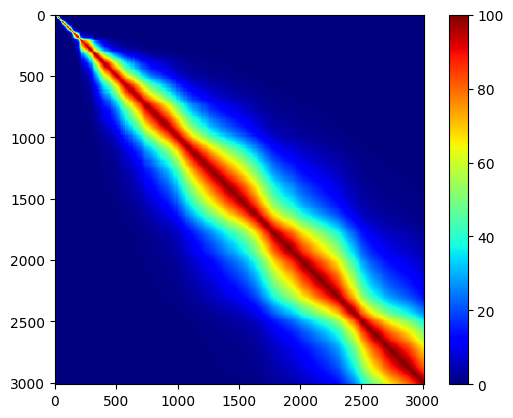

In [ ]:
plt.imshow(overlapMatrix, cmap='jet',vmin=0,vmax=100)
plt.colorbar()
plt.show()

Next, I'll apply the mapping. The idea here is to
1. Start with a masking array full of either just 1 or 0. This will serve as the 'background' coloring for transition pairs that have percent overlaps below the overlap threshold.
2. Then, a simple mapping function between the cluster id and the correponding transition will be applied to the matrix that will allow me to color code each pixel accordingly.

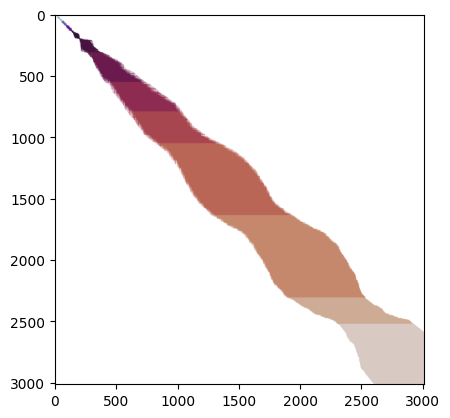

In [ ]:
clusterMapping = df['cluster'].values

# Get the cluster color palette
palette = sns.color_palette('twilight', 17)
colors = {i: palette[i] for i in range(17)}

# Create a color matrix initialized with ones (white color)
colorMatrix1 = np.ones(overlapMatrix1.shape + (3,))

# Apply colors based on clusters and overlap percentage
for i, cluster_id in enumerate(clusterMapping1):
    for j in range(overlapMatrix1.shape[1]):
        if overlapMatrix1[i, j] >= 50:
            colorMatrix1[i, j] = colors[cluster_id]

plt.imshow(colorMatrix1)
plt.show()

That worked well. However, the boundaries are not quite right. They are partitioning the clusters row-wise only. I'll write a quick algorithm to consider both transitions in the pair.

# Using the Lookup Table to Define/Find Cluster Boundaries (THIS IS THE ONE)

In [5]:
# Detecting the points where the cluster value changes
cluster_changes = df['cluster'].diff().ne(0)

# Creating the lookup table
lookup_table = df[cluster_changes][['cluster']].reset_index()
lookup_table.rename(columns={'index': 'Change Index'}, inplace=True)

lookup_table

,Change Index,cluster
0,0,0
1,18,1
2,37,2
3,42,3
4,54,4
5,87,5
6,94,6
7,134,7
8,141,8
9,203,9


Processing Rows: 100%|██████████| 100/100 [00:04<00:00, 22.02it/s]


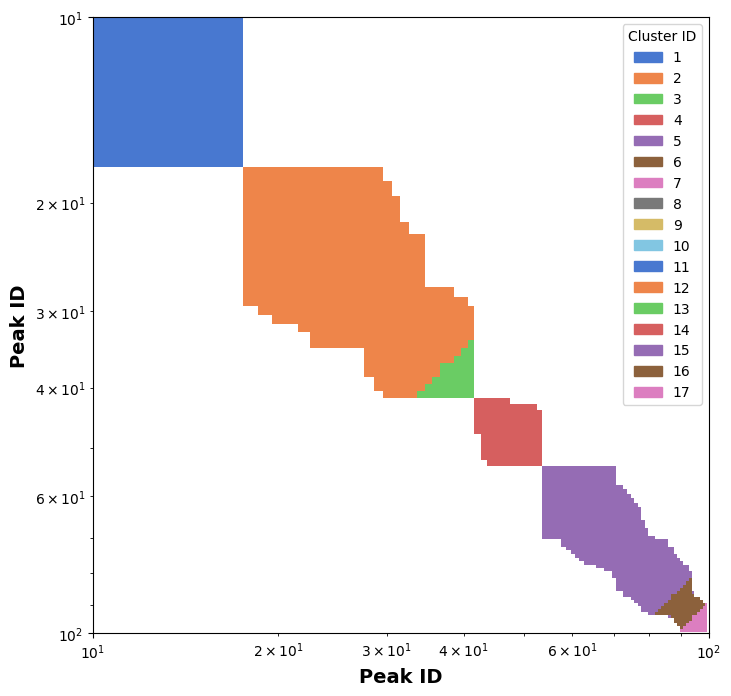

In [5]:
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker
from functools import lru_cache
from tqdm import tqdm
import numba

clusterMapping = df['cluster'].values
num_clusters = len(np.unique(clusterMapping))

palette = sns.color_palette('muted', num_clusters)
colors = {i: palette[i] for i in range(num_clusters)}

n=100
small_overlap_matrix = overlapMatrix[:n, :n]

# Adjust the map_index_to_cluster to handle edge cases
def map_index_to_cluster(index, lookup_table):
    # This assumes that the 'Change Index' in lookup_table is sorted
    last_valid_index = lookup_table[lookup_table['Change Index'] <= index].last_valid_index()
    if last_valid_index is not None:
        return lookup_table.at[last_valid_index, 'cluster']
    return None  # Or some default value if needed

# Pre-compute the cluster ID for each index in the dataset
precomputed_cluster_ids = [map_index_to_cluster(i, lookup_table) for i in range(overlapMatrix.shape[0])]

# Simulate a smaller precomputed_cluster_ids based on the subset
small_precomputed_cluster_ids = precomputed_cluster_ids[:n]

# Update the color_for_position function to include the lookup condition
def color_for_position(i, j, precomputed_cluster_ids, overlapMatrix, threshold, colors, lookup_table):
    cluster_i = precomputed_cluster_ids[i]
    cluster_j = precomputed_cluster_ids[j]

    # Get the 'Change Index' for the minimum cluster between i and j
    change_index = lookup_table[lookup_table['cluster'].isin([cluster_i, cluster_j])]['Change Index'].max()

    # If i + j is less than or equal to twice the change index and above the threshold, assign color
    if i + j <= 2 * change_index and overlapMatrix[i, j] >= threshold:
        min_cluster_id = min(cluster_i, cluster_j)
        return colors.get(min_cluster_id, [1, 1, 1])
    elif i + j >= 2 * change_index and overlapMatrix[i, j] >= threshold:
        min_cluster_id = max(cluster_i, cluster_j)
        return colors.get(min_cluster_id, [1, 1, 1])
    else:
        return [1, 1, 1]  # Default to white

# Create a color matrix for the subset
small_color_matrix = np.ones(small_overlap_matrix.shape + (3,))

# Apply colors based on the condition involving the 'Change Index'
for i in tqdm(range(small_overlap_matrix.shape[0]), desc="Processing Rows"):
      for j in range(small_overlap_matrix.shape[1]):
        small_color_matrix[i, j] = color_for_position(i, j, small_precomputed_cluster_ids, small_overlap_matrix, 50, colors, lookup_table)

# Set up the figure with a larger size
fig, ax = plt.subplots(figsize=(8, 8))

# Add a color legend for clusters with a title
legend_handles = [mpatches.Patch(color=colors[i], label=f'{i+1}') for i in colors]
ax.legend(handles=legend_handles, loc='upper right', title='Cluster ID')  # Place legend in top right
ax.set_xlabel('Peak ID', fontsize=14, fontweight='bold')
ax.set_ylabel('Peak ID', fontsize=14, fontweight='bold')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(left=10,right=len(small_overlap_matrix))
ax.set_ylim(bottom=10,top=len(small_overlap_matrix))
# Invert the axes
ax.invert_yaxis()

# Plotting the color matrix
plt.imshow(small_color_matrix)
plt.show()

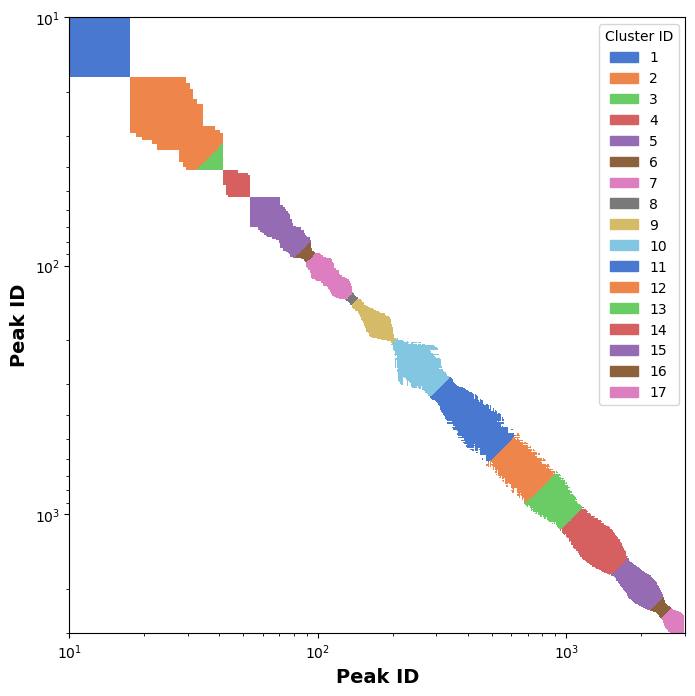

In [6]:
clusterMapping = df['cluster'].values
num_clusters = len(np.unique(clusterMapping))

palette = sns.color_palette('muted', num_clusters)
colors = {i: palette[i] for i in range(num_clusters)}

n=len(overlapMatrix)
small_overlap_matrix = overlapMatrix[:n, :n]

# Adjust the map_index_to_cluster to handle edge cases
def map_index_to_cluster(index, lookup_table):
    # This assumes that the 'Change Index' in lookup_table is sorted
    last_valid_index = lookup_table[lookup_table['Change Index'] <= index].last_valid_index()
    if last_valid_index is not None:
        return lookup_table.at[last_valid_index, 'cluster']
    return None  # Or some default value if needed

# Pre-compute the cluster ID for each index in the dataset
precomputed_cluster_ids = [map_index_to_cluster(i, lookup_table) for i in range(overlapMatrix.shape[0])]

# Simulate a smaller precomputed_cluster_ids based on the subset
small_precomputed_cluster_ids = precomputed_cluster_ids[:n]

def vectorized_color_assignment(precomputed_cluster_ids, overlapMatrix, threshold, colors, lookup_table):
    # Convert the lookup_table to a more efficient structure for vectorized operations
    lookup_dict = {row['cluster']: row['Change Index'] for index, row in lookup_table.iterrows()}

    # Ensure precomputed_cluster_ids is a NumPy array
    precomputed_cluster_ids = np.array(precomputed_cluster_ids)

    # Extracting the cluster ids for each index
    clusters_i = precomputed_cluster_ids[:, None]
    clusters_j = precomputed_cluster_ids[None, :]

    # Calculating the change indices for each pair
    change_indices_i = np.vectorize(lookup_dict.get)(clusters_i)
    change_indices_j = np.vectorize(lookup_dict.get)(clusters_j)
    change_indices_max = np.maximum(change_indices_i, change_indices_j)

    # Applying conditions
    sum_indices = np.arange(len(overlapMatrix))[:, None] + np.arange(len(overlapMatrix))[None, :]
    condition1 = sum_indices <= 2 * change_indices_max  # i + j <= 2 * max change index
    condition2 = sum_indices >= 2 * change_indices_max  # i + j >= 2 * max change index
    condition3 = overlapMatrix >= threshold

    # Assign colors based on the conditions
    color_matrix = np.ones(overlapMatrix.shape + (3,))
    min_clusters = np.minimum(clusters_i, clusters_j)
    max_clusters = np.maximum(clusters_i, clusters_j)

    for cluster_id, color in colors.items():
        cluster_condition_min = np.logical_and(min_clusters == cluster_id, condition1)
        cluster_condition_max = np.logical_and(max_clusters == cluster_id, condition2)
        final_condition = np.logical_and(condition3, np.logical_or(cluster_condition_min, cluster_condition_max))
        color_matrix[final_condition] = color

    return color_matrix

# Use the vectorized function
color_matrix = vectorized_color_assignment(small_precomputed_cluster_ids, small_overlap_matrix, 50, colors, lookup_table)

# Set up the figure with a larger size
fig, ax = plt.subplots(figsize=(8, 8))

# Add a color legend for clusters with a title
legend_handles = [mpatches.Patch(color=colors[i], label=f'{i+1}') for i in colors]
ax.legend(handles=legend_handles, loc='upper right', title='Cluster ID')  # Place legend in top right
ax.set_xlabel('Peak ID', fontsize=14, fontweight='bold')
ax.set_ylabel('Peak ID', fontsize=14, fontweight='bold')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(left=10,right=len(color_matrix))
ax.set_ylim(bottom=10,top=len(color_matrix))
# Invert the axes
ax.invert_yaxis()

# Plotting the color matrix
plt.imshow(color_matrix)
plt.show()

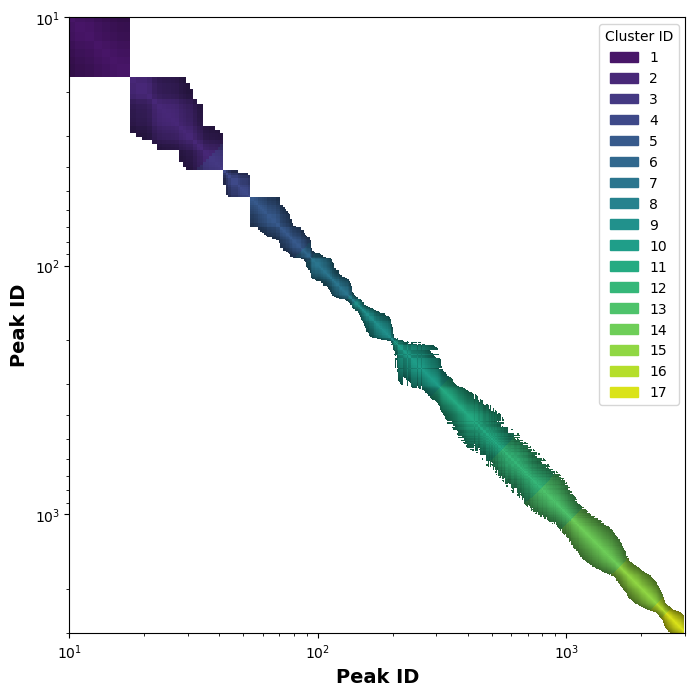

In [51]:
clusterMapping = df['cluster'].values
num_clusters = len(np.unique(clusterMapping))

palette = sns.color_palette('viridis', num_clusters)
colors = {i: palette[i] for i in range(num_clusters)}

n=len(overlapMatrix)
small_overlap_matrix = overlapMatrix[:n, :n]

# Adjust the map_index_to_cluster to handle edge cases
def map_index_to_cluster(index, lookup_table):
    # This assumes that the 'Change Index' in lookup_table is sorted
    last_valid_index = lookup_table[lookup_table['Change Index'] <= index].last_valid_index()
    if last_valid_index is not None:
        return lookup_table.at[last_valid_index, 'cluster']
    return None  # Or some default value if needed

# Pre-compute the cluster ID for each index in the dataset
precomputed_cluster_ids = [map_index_to_cluster(i, lookup_table) for i in range(overlapMatrix.shape[0])]

# Simulate a smaller precomputed_cluster_ids based on the subset
small_precomputed_cluster_ids = precomputed_cluster_ids[:n]

def vectorized_color_assignment(precomputed_cluster_ids, overlapMatrix, threshold, colors, lookup_table):
    # Convert the lookup_table to a more efficient structure for vectorized operations
    lookup_dict = {row['cluster']: row['Change Index'] for index, row in lookup_table.iterrows()}

    # Ensure precomputed_cluster_ids is a NumPy array
    precomputed_cluster_ids = np.array(precomputed_cluster_ids)

    # Extracting the cluster ids for each index
    clusters_i = precomputed_cluster_ids[:, None]
    clusters_j = precomputed_cluster_ids[None, :]

    # Calculating the change indices for each pair
    change_indices_i = np.vectorize(lookup_dict.get)(clusters_i)
    change_indices_j = np.vectorize(lookup_dict.get)(clusters_j)
    change_indices_max = np.maximum(change_indices_i, change_indices_j)

    # Applying conditions
    sum_indices = np.arange(len(overlapMatrix))[:, None] + np.arange(len(overlapMatrix))[None, :]
    condition1 = sum_indices <= 2 * change_indices_max  # i + j <= 2 * max change index
    condition2 = sum_indices >= 2 * change_indices_max  # i + j >= 2 * max change index
    condition3 = overlapMatrix >= threshold

    # Assign colors based on the conditions
    color_matrix = np.ones(overlapMatrix.shape + (3,))
    min_clusters = np.minimum(clusters_i, clusters_j)
    max_clusters = np.maximum(clusters_i, clusters_j)

    intensity_factor = overlapMatrix / 100

    for cluster_id, base_color in colors.items():
        # Calculate modulated color for each cluster
        modulated_color = np.array(base_color) * intensity_factor[..., None]  # Apply intensity to RGB

        cluster_condition_min = np.logical_and(min_clusters == cluster_id, condition1)
        cluster_condition_max = np.logical_and(max_clusters == cluster_id, condition2)
        final_condition = np.logical_and(condition3, np.logical_or(cluster_condition_min, cluster_condition_max))

        #for i in range(3):  # Iterate over R, G, B channels
        #    color_matrix[..., i] = np.where(final_condition, modulated_color[..., i], color_matrix[..., i])
        color_matrix = np.where(final_condition[..., None], modulated_color, color_matrix)
    color_matrix[overlapMatrix < threshold] = [1, 1, 1] 
    
    return color_matrix

# Use the vectorized function
color_matrix = vectorized_color_assignment(small_precomputed_cluster_ids, small_overlap_matrix, 50, colors, lookup_table)

# Set up the figure with a larger size
fig, ax = plt.subplots(figsize=(8, 8))

# Add a color legend for clusters with a title
legend_handles = [mpatches.Patch(color=colors[i], label=f'{i+1}') for i in colors]
ax.legend(handles=legend_handles, loc='upper right', title='Cluster ID')  # Place legend in top right
ax.set_xlabel('Peak ID', fontsize=14, fontweight='bold')
ax.set_ylabel('Peak ID', fontsize=14, fontweight='bold')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(left=10,right=len(color_matrix))
ax.set_ylim(bottom=10,top=len(color_matrix))
# Invert the axes
ax.invert_yaxis()

# Plotting the color matrix
plt.imshow(color_matrix)
plt.show()

# Initial Interactive Visualization

I want to make this more interactive. I played around with plotly for a bit and this was as good as I could get it. Implementing the functionalities of the static plot will require more tinkering. Maybe later...

In [75]:
# Create a subplot with one plot
fig = make_subplots(rows=1, cols=1)

#Set n between 1 - len(overlapMatrix). I would suggest doing a 100 x 100 for basic prototyping 
n=700#len(overlapMatrix)
small_overlap_matrix = overlapMatrix[:n, :n]
small_precomputed_cluster_ids = precomputed_cluster_ids[:n]
small_color_matrix = color_matrix[:n, :n]

# Normalize the color matrix if not already normalized
small_color_matrix = small_color_matrix / np.max(small_color_matrix)

# Set areas where overlap is below 50 to white
small_color_matrix[small_overlap_matrix < 50] =  [1, 1, 1]

# Create hover text
hover_text = [
    [f'Cluster: {small_precomputed_cluster_ids[i]}, Overlap: {small_overlap_matrix[i, j]:.2f}%' for j in range(n)]
    for i in range(n)
]

# Create a subplot with one plot
fig = make_subplots(rows=1, cols=1)

# We will use the 'imshow' function from Plotly to display the color matrix
# The 'z' parameter is the matrix to display, and 'colorscale' is the palette
fig.add_trace(
    go.Heatmap(
        z=np.flipud(small_color_matrix),  # Flip the matrix in the up-down direction if necessary
        colorscale='twilight',  # Disable the colorscale since we are using RGB values directly
        showscale=True,  # Hide the color scale since we are specifying colors directly
        hoverinfo='text',
        text=hover_text
    )
)

# Convert the 3D RGB array to a 2D grayscale intensity array
intensity_matrix = small_color_matrix.mean(axis=2)

# Update the heatmap trace with the 2D intensity matrix
fig.data[0].z = intensity_matrix * 100

# For example, if your limits are 10 to 100, the logarithms would be 1 to 2
fig.update_xaxes(range=[np.log10(10), np.log10(len(small_color_matrix))], type='log',title_text='Peak ID', row=1, col=1)
fig.update_yaxes(range=[np.log10(len(small_color_matrix)), np.log10(10)], type='log', autorange=False, title_text='Peak ID')

# Now update the layout and re-plot
fig.update_layout(title='Cluster Visualization',autosize=False,width=600,height=600)
pio.write_html(fig, file='dft_clusters2.html', auto_open=True)
#fig.show()

In [71]:
import plotly.io as pio
# Now save it to an HTML file
pio.write_html(fig, file='dft_clusters.html', auto_open=True)

# Peaky method

Also, showcasing various color palettes for later

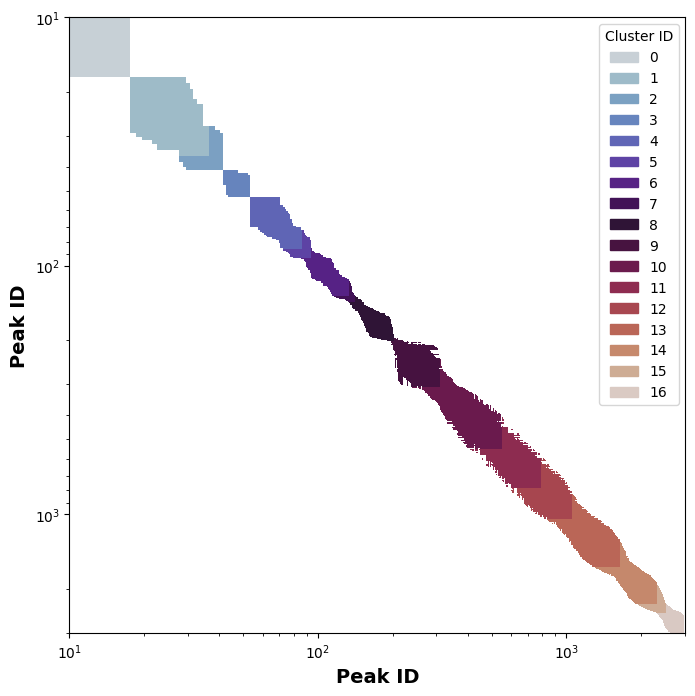

In [29]:
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker

clusterMapping = df['cluster'].values
num_clusters = len(np.unique(clusterMapping))

palette = sns.color_palette('twilight', num_clusters)
colors = {i: palette[i] for i in range(num_clusters)}

# Create a color matrix initialized with ones (white color)
colorMatrix = np.ones(overlapMatrix.shape + (3,))


def vectorized_color_for_position(i, j, clusterMapping, overlapMatrix, threshold, colors):
    # Flattening i and j for vectorized operations
    i_flat = i.flatten()
    j_flat = j.flatten()

    # Creating a mask for conditions
    below_threshold = overlapMatrix[i_flat, j_flat] < threshold
    on_diagonal = i_flat == j_flat

    # Initializing an array to hold the colors
    result = np.ones((i_flat.size, 3))  # Default to white

    # Applying conditions for diagonal and above threshold, element-wise
    for idx in range(i_flat.size):
        if on_diagonal[idx]:
            result[idx] = colors[clusterMapping[i_flat[idx]]]
        elif not below_threshold[idx]:
            if i_flat[idx] < j_flat[idx]:
                result[idx] = colors[clusterMapping[j_flat[idx]]]
            else:
                result[idx] = colors[clusterMapping[i_flat[idx]]]

    # Reshape the result back to the original matrix shape
    return result.reshape(i.shape + (3,))

# Create meshgrids for the indices
i_indices, j_indices = np.meshgrid(np.arange(len(clusterMapping)), np.arange(len(clusterMapping)), indexing='ij')

# Apply the vectorized function to generate the color matrix
colorMatrix = vectorized_color_for_position(i_indices, j_indices, clusterMapping, overlapMatrix, 50, colors)

# Reshape the colorMatrix to the correct shape
colorMatrix = colorMatrix.reshape(len(clusterMapping), len(clusterMapping), 3)

# Set up the figure with a larger size
fig, ax = plt.subplots(figsize=(8, 8))

# Add a color legend for clusters with a title
legend_handles = [mpatches.Patch(color=colors[i], label=f'{i}') for i in colors]
ax.legend(handles=legend_handles, loc='upper right', title='Cluster ID')  # Place legend in top right
ax.set_xlabel('Peak ID', fontsize=14, fontweight='bold')
ax.set_ylabel('Peak ID', fontsize=14, fontweight='bold')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(left=10,right=len(df))
ax.set_ylim(bottom=10,top=len(df))
# Invert the axes
ax.invert_yaxis()

plt.imshow(colorMatrix)
plt.show()

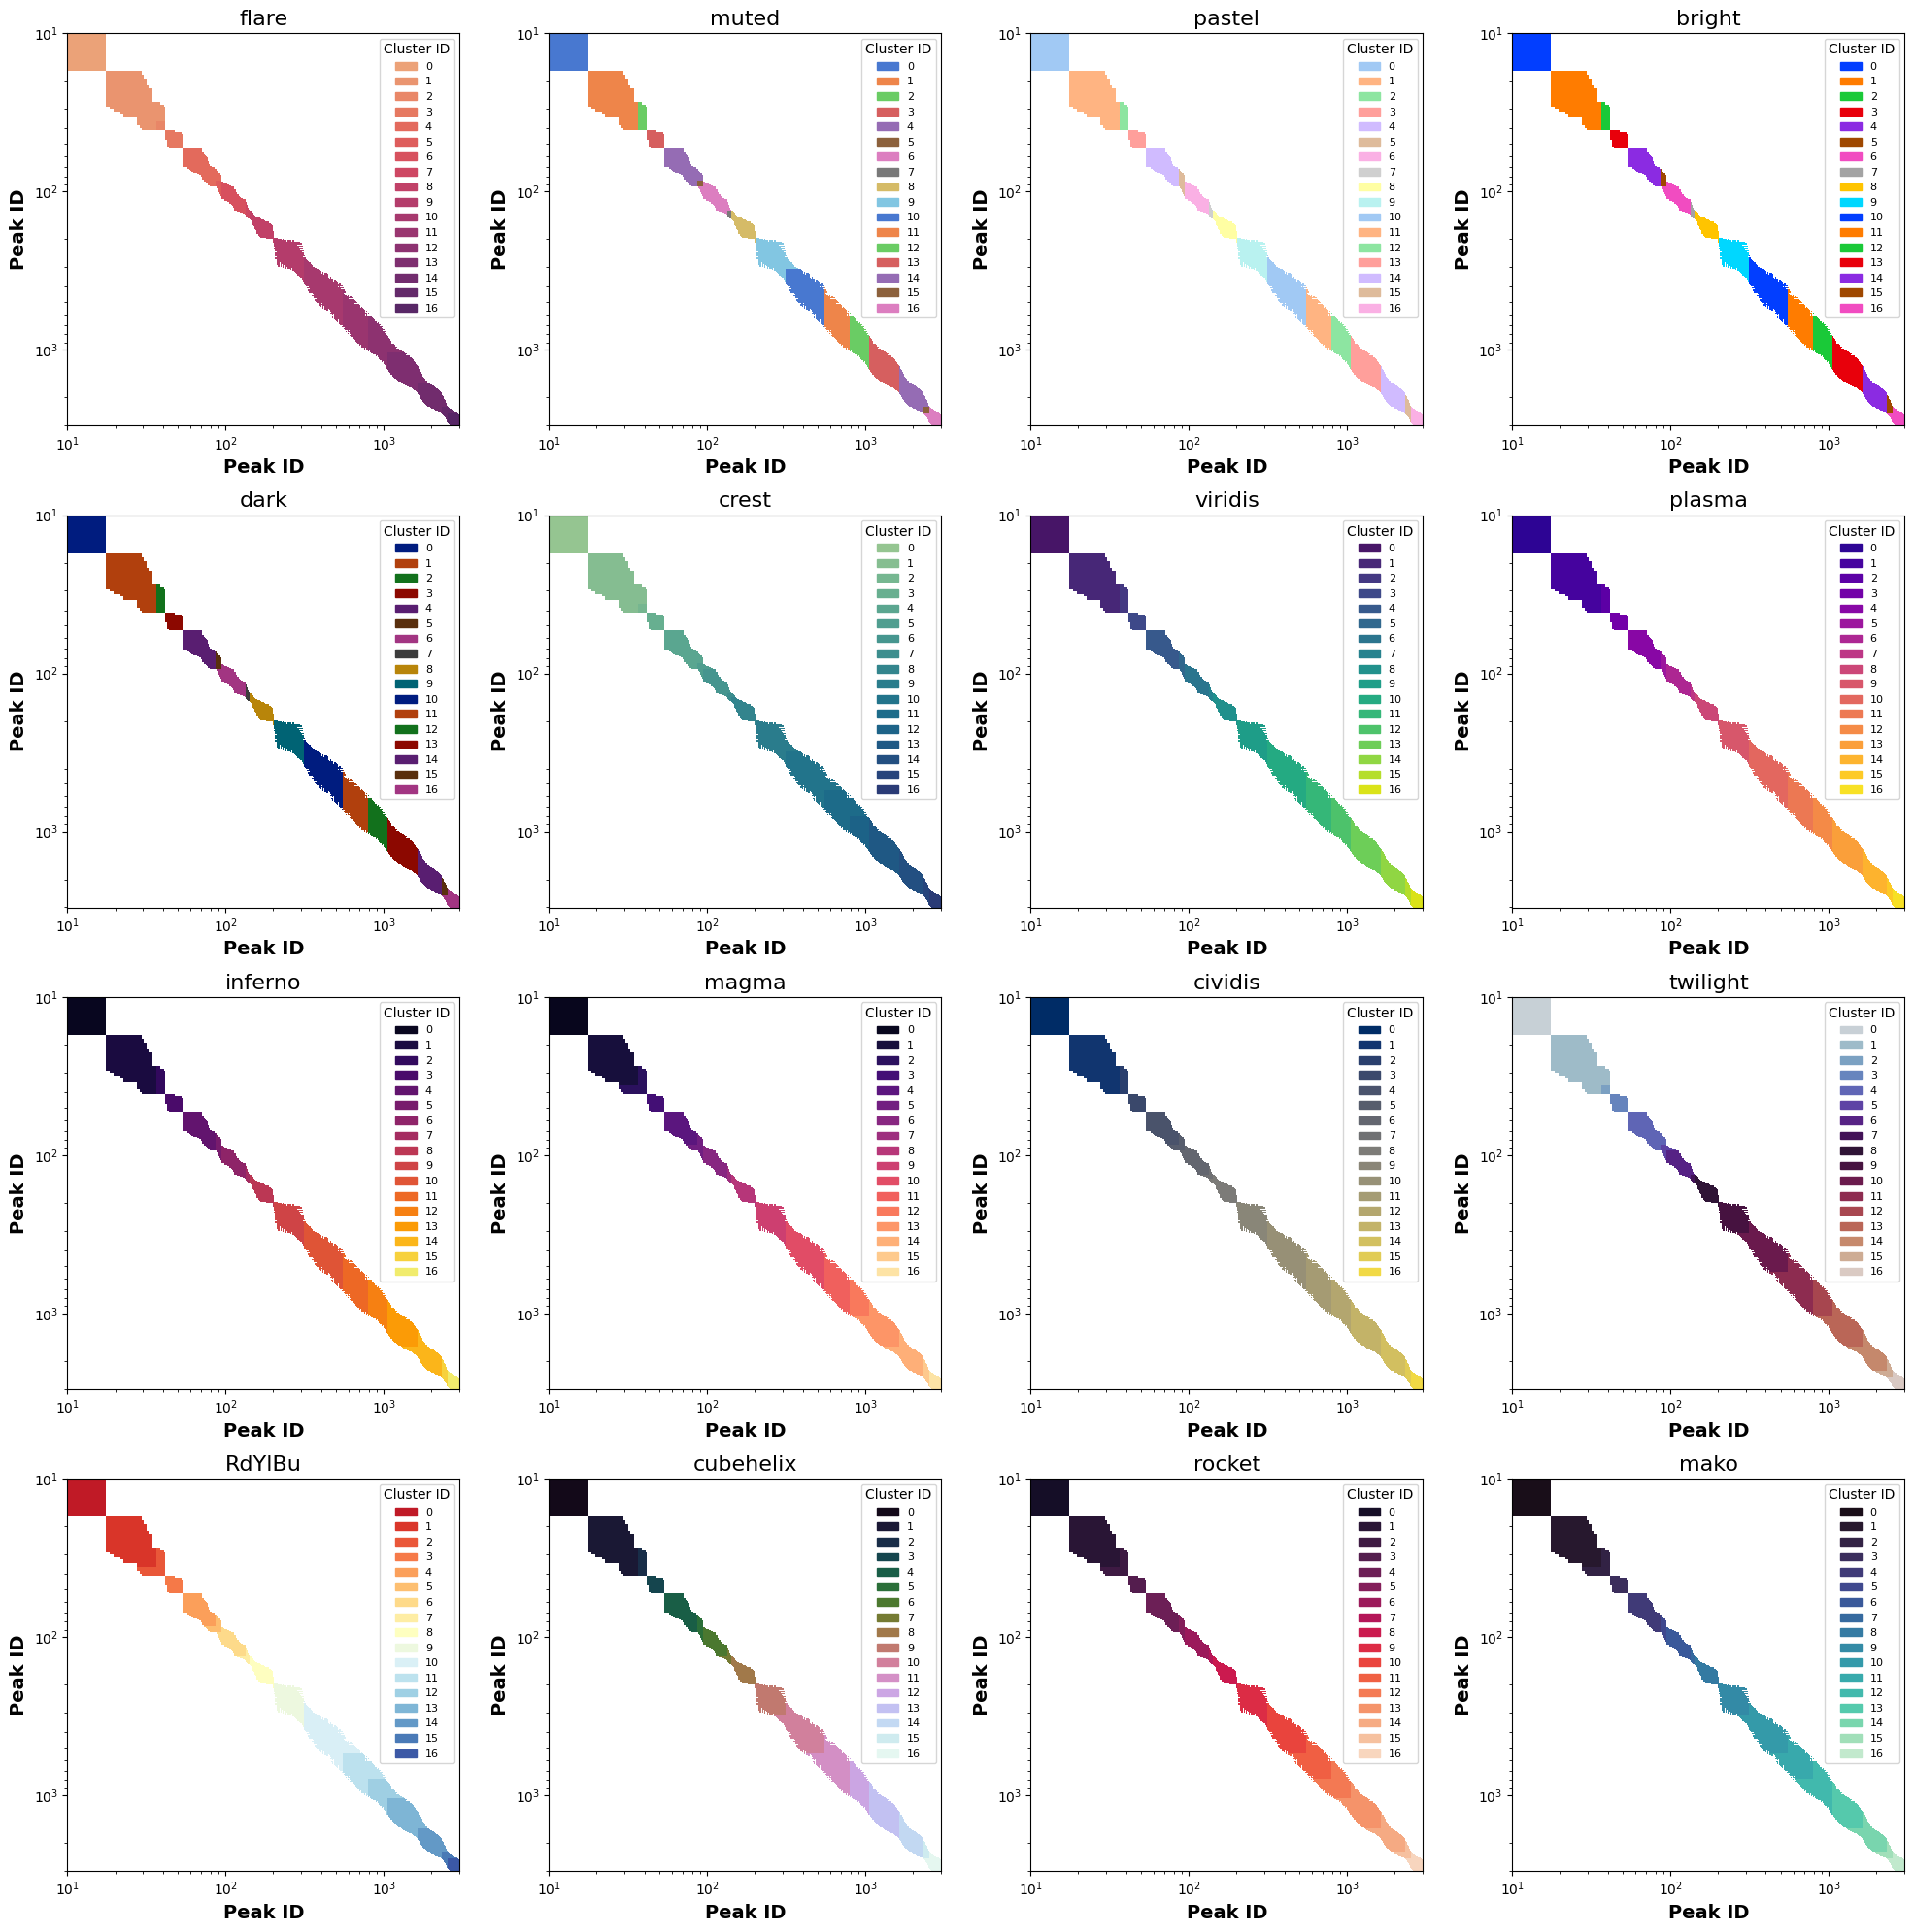

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as mpatches

# Sample data for demonstration purposes
clusterMapping = df['cluster'].values
num_clusters = len(np.unique(clusterMapping))

# Define the palettes to use
color_palettes = [
    "flare",
    "muted",
    "pastel",
    "bright",
    "dark",
    "crest",
    "viridis",
    "plasma",
    "inferno",
    "magma",
    "cividis",
    "twilight",
    "RdYlBu",
    "cubehelix",
    "rocket",
    "mako"
]

# Create a figure with 4x4 subplots
fig, axes = plt.subplots(4, 4, figsize=(20, 20))

# Iterate over the palettes and axes
for ax, palette_name in zip(axes.flatten(), color_palettes):
    #clusterMapping = df['cluster'].values
    #num_clusters = len(np.unique(clusterMapping))
    palette = sns.color_palette(palette_name, num_clusters)
    colors = {i: palette[i] for i in range(num_clusters)}
    colorMatrix = np.ones(overlapMatrix.shape + (3,))  # White color matrix

    def average_color(color1, color2):
        use_color1 = True
        for a, b in zip(color1, color2):
            if a + b > 2 * a:
                use_color1 = False
                break
        return color1 if use_color1 else color2

    for i, cluster_id_i in enumerate(clusterMapping):
        for j, cluster_id_j in enumerate(clusterMapping):
            if overlapMatrix[i, j] >= 50:
                colorMatrix[i, j] = average_color(colors[cluster_id_i], colors[cluster_id_j])

    legend_handles = [mpatches.Patch(color=colors[i], label=f'{i}') for i in colors]
    ax.legend(handles=legend_handles, loc='upper right', title='Cluster ID', fontsize=8)
    ax.set_xlabel('Peak ID', fontsize=14, fontweight='bold')
    ax.set_ylabel('Peak ID', fontsize=14, fontweight='bold')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim(left=10, right=len(df))
    ax.set_ylim(bottom=10, top=len(df))
    ax.invert_yaxis()
    ax.imshow(colorMatrix)
    ax.set_title(palette_name, fontsize=16)

plt.tight_layout()
plt.show()

# Averaging Method

I'm keeping this here because I like how it looks. I think the use of an average color is a nice way to highlight how the clusters can overlap (good to showcase potential mixing).

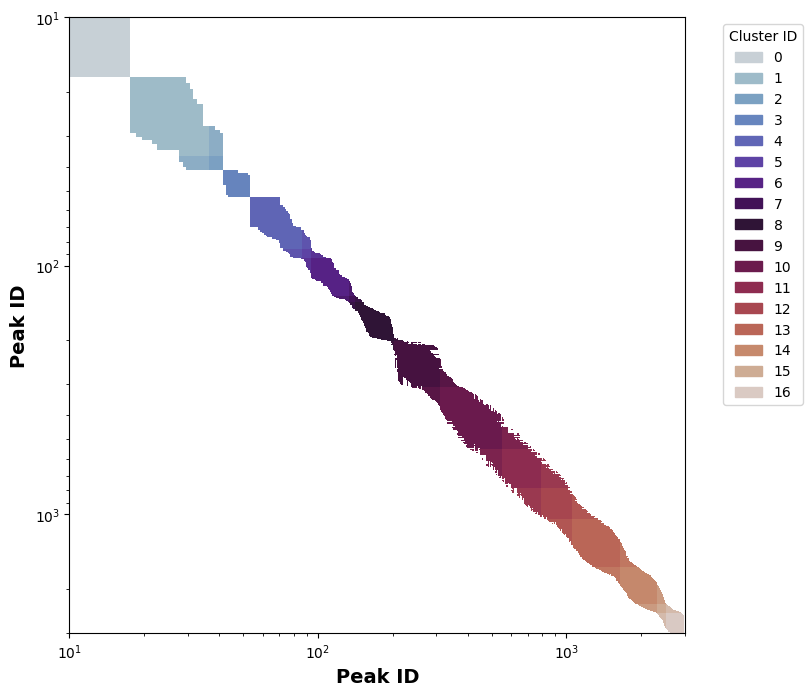

In [ ]:
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker

clusterMapping = df['cluster'].values
num_clusters = len(np.unique(clusterMapping))

palette = sns.color_palette('twilight', num_clusters)
colors = {i: palette[i] for i in range(num_clusters)}

# Create a color matrix initialized with ones (white color)
colorMatrix = np.ones(overlapMatrix.shape + (3,))

# Compute the average color of two clusters
def average_color(color1, color2):
    return [(a+b)/2 for a, b in zip(color1, color2)]

# Set up the figure with a larger size
fig, ax = plt.subplots(figsize=(8, 8))

# Apply colors based on combined clusters and overlap percentage
for i, cluster_id_i in enumerate(clusterMapping):
    for j, cluster_id_j in enumerate(clusterMapping):
        if overlapMatrix[i, j] >= 50:
            colorMatrix[i, j] = average_color(colors[cluster_id_i], colors[cluster_id_j])

# Add a color legend for clusters with a title
legend_handles = [mpatches.Patch(color=colors[i], label=f'{i}') for i in colors]
ax.legend(handles=legend_handles, bbox_to_anchor=(1.05, 1), loc='upper left', title='Cluster ID')
ax.set_xlabel('Peak ID', fontsize=14, fontweight='bold')
ax.set_ylabel('Peak ID', fontsize=14, fontweight='bold')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(left=10,right=len(df))
ax.set_ylim(bottom=10,top=len(df))
# Invert the axes
#ax.invert_xaxis()
ax.invert_yaxis()

plt.imshow(colorMatrix)
plt.show()

In this situation, I'll take the average between the color associated with both clusters

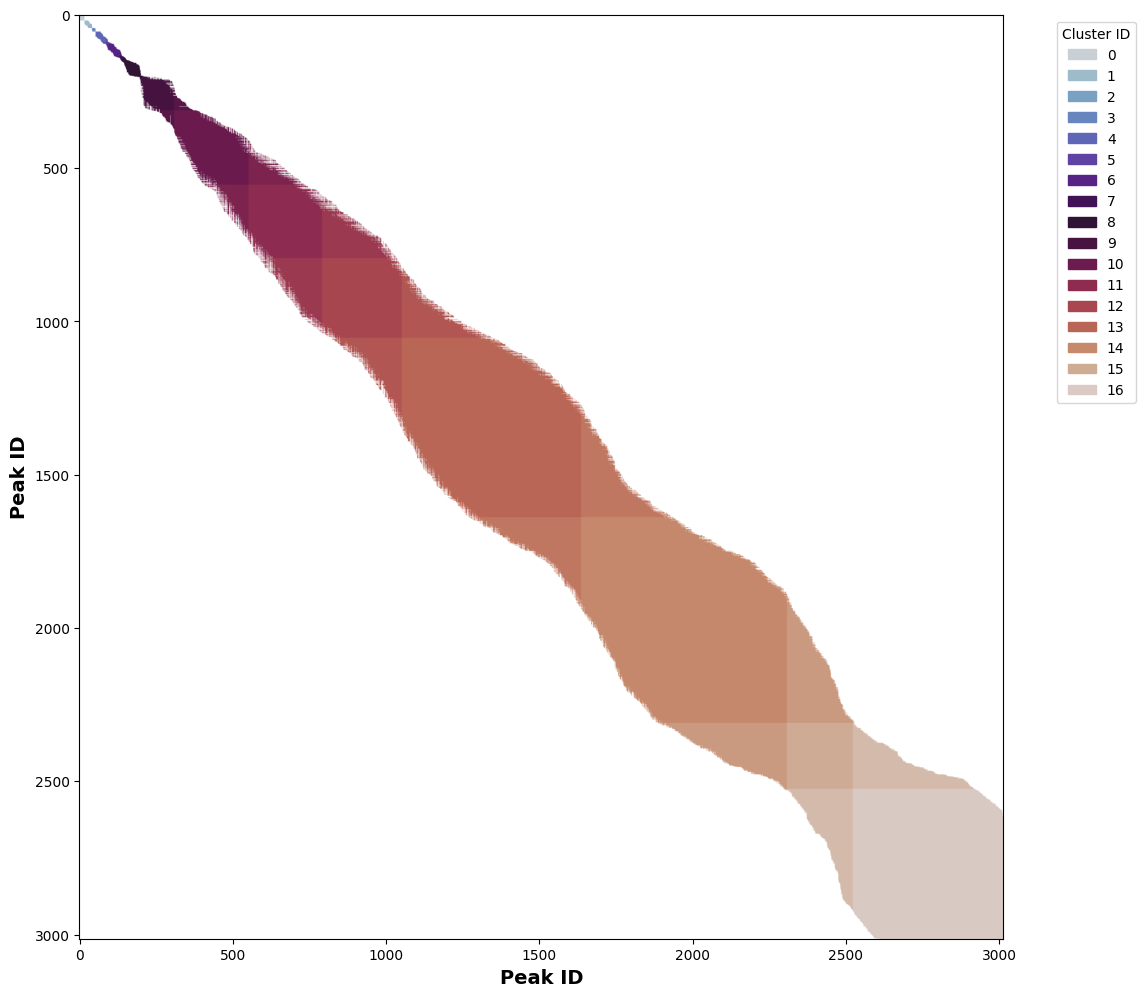

In [ ]:
import matplotlib.patches as mpatches

clusterMapping = df['cluster'].values
num_clusters = len(np.unique(clusterMapping))

palette = sns.color_palette('twilight', num_clusters)
colors = {i: palette[i] for i in range(num_clusters)}

# Create a color matrix initialized with ones (white color)
colorMatrix = np.ones(overlapMatrix.shape + (3,))

# Compute the average color of two clusters
def average_color(color1, color2):
    return [(a+b)/2 for a, b in zip(color1, color2)]


# Set up the figure with a larger size
fig, ax = plt.subplots(figsize=(12, 12))

# Apply colors based on combined clusters and overlap percentage
for i, cluster_id_i in enumerate(clusterMapping):
    for j, cluster_id_j in enumerate(clusterMapping):
        if overlapMatrix[i, j] >= 50:
            colorMatrix[i, j] = average_color(colors[cluster_id_i], colors[cluster_id_j])

# Add a color legend for clusters with a title
legend_handles = [mpatches.Patch(color=colors[i], label=f'{i}') for i in colors]
ax.legend(handles=legend_handles, bbox_to_anchor=(1.05, 1), loc='upper left', title='Cluster ID')
ax.set_xlabel('Peak ID', fontsize=14, fontweight='bold')
ax.set_ylabel('Peak ID', fontsize=14, fontweight='bold')
plt.imshow(colorMatrix)
plt.show()

Now I'll plot them side by side with a Python function

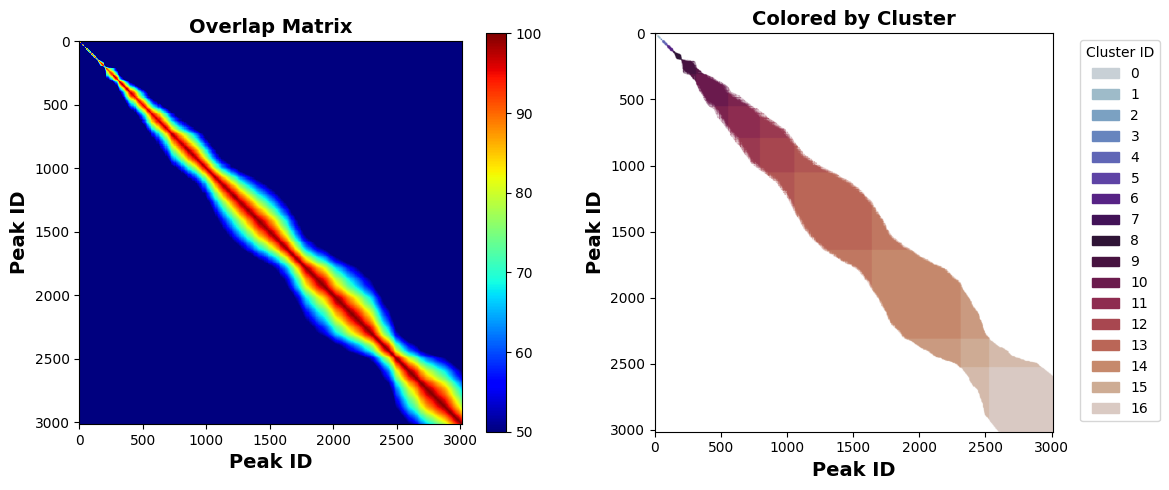

In [ ]:
import matplotlib.patches as mpatches

def plot_overlap_and_clusters(overlapMatrix, df):
    """
    Plots the overlap matrix and a color matrix based on cluster mapping side by side.

    Parameters:
    - overlapMatrix (numpy.ndarray): A 2D array representing the overlap percentages.
    - clusterMapping (numpy.ndarray or list): A 1D array or list that maps each observation in overlapMatrix to a cluster.

    Returns:
    None. Displays the plots.
    """
    clusterMapping = df['cluster'].values

    # Setting up a figure with 2 subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Plotting the overlapMatrix on the first subplot
    axes[0].imshow(overlapMatrix, cmap='jet',vmin=50,vmax=100)
    axes[0].set_title('Overlap Matrix', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Peak ID', fontsize=14, fontweight='bold')
    axes[0].set_ylabel('Peak ID', fontsize=14, fontweight='bold')
    fig.colorbar(plt.cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=50, vmax=100)), ax=axes[0])

    # Get the cluster color palette
    palette = sns.color_palette('twilight', 17)
    colors = {i: palette[i] for i in range(17)}

    # Create a color matrix initialized with ones (white color)
    colorMatrix = np.ones(overlapMatrix.shape + (3,))

    # Apply colors based on combined clusters and overlap percentage
    for i, cluster_id_i in enumerate(clusterMapping):
        for j, cluster_id_j in enumerate(clusterMapping):
            if overlapMatrix[i, j] >= 50:
                colorMatrix[i, j] = average_color(colors[cluster_id_i], colors[cluster_id_j])

    # Plotting the colorMatrix on the second subplot
    axes[1].imshow(colorMatrix)
    axes[1].set_title('Colored by Cluster', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Peak ID', fontsize=14, fontweight='bold')
    axes[1].set_ylabel('Peak ID', fontsize=14, fontweight='bold')

    # Add a color legend for clusters with a title
    legend_handles = [mpatches.Patch(color=colors[i], label=f'{i}') for i in colors]
    axes[1].legend(handles=legend_handles, bbox_to_anchor=(1.05, 1), loc='upper left', title='Cluster ID')

    plt.tight_layout()
    plt.show()

    return colorMatrix

# Sample usage
colorMatrix1 = plot_overlap_and_clusters(overlapMatrix, df)

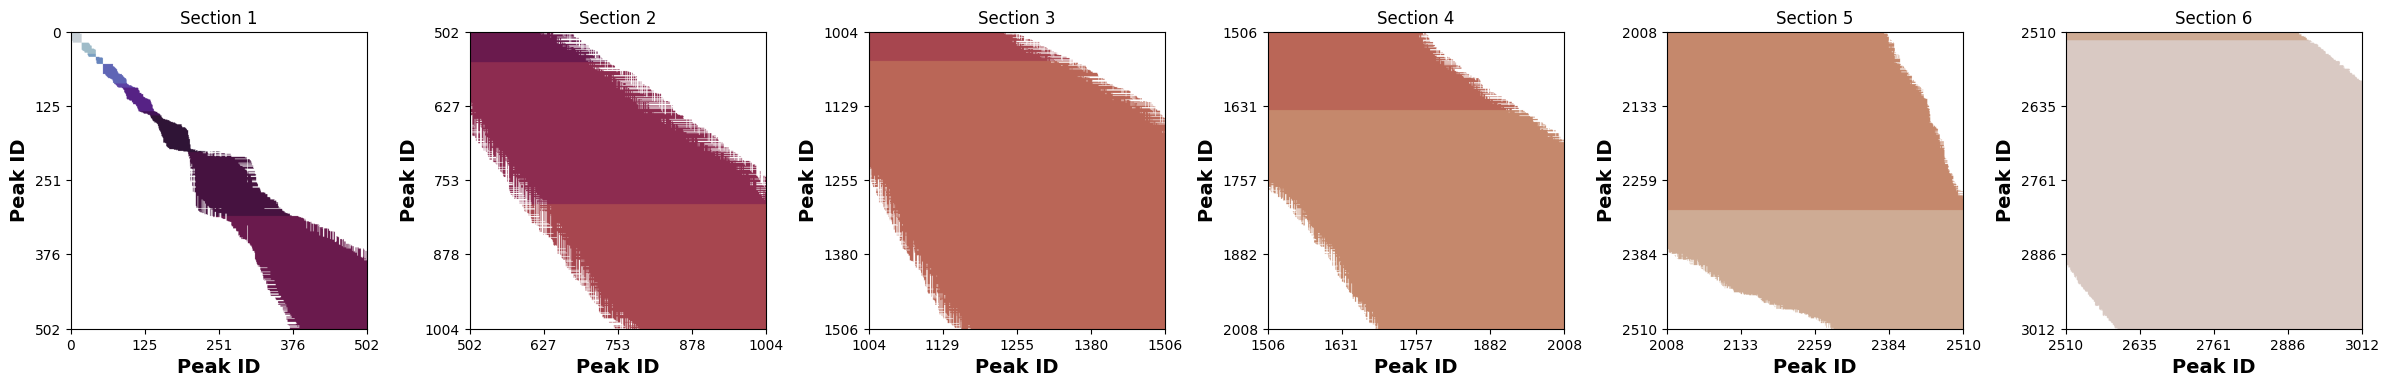

In [ ]:
N = 6  # Number of sections you want to split into
section_size = colorMatrix1.shape[0] // N

sections = []
for i in range(N):
    rows_slice = slice(i*section_size, (i+1)*section_size)
    cols_slice = slice(i*section_size, (i+1)*section_size)
    sections.append(colorMatrix1[rows_slice, cols_slice])

# Setting up a figure with N subplots vertically
fig, axes = plt.subplots(1, N, figsize=(4*N, 4*N))

for i in range(N):
    # The extent values are [left, right, bottom, top] for each section
    start, end = i * section_size, (i + 1) * section_size
    tick_positions = [int(val) for val in np.linspace(start, end, 5)]  # Convert to integers

    axes[i].imshow(sections[i], extent=[start, end, end, start])
    axes[i].set_xticks(tick_positions)
    axes[i].set_yticks(tick_positions)
    axes[i].set_title(f'Section {i+1}')
    axes[i].set_xlabel('Peak ID', fontsize=14, fontweight='bold')
    axes[i].set_ylabel('Peak ID', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
colorMatrix.shape

(3014, 3014, 3)

# Miscellaneous experimentation

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go


# Convert the colorMatrix1 to grayscale for the Z values
Z = np.dot(colorMatrix[...,:3], [0.2989, 0.5870, 0.1140])

# Create the surface plot
fig = go.Figure(data=[go.Surface(z=Z)])

# Update layout for better view
fig.update_layout(title='3D Surface Plot of colorMatrix1',
                  scene=dict(zaxis=dict(range=[Z.min(), Z.max()])),
                  margin=dict(r=0, b=0, l=0, t=40)
                  )

fig.show()

Now let's try it for the original overlap matrix

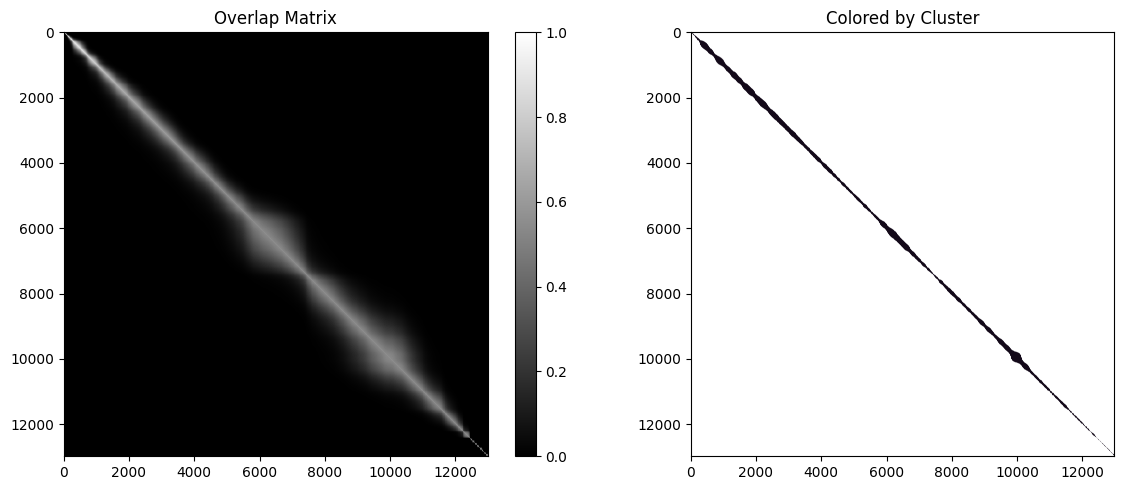

In [ ]:
colorMatrix2 = plot_overlap_and_clusters(overlapMatrix2, df2)

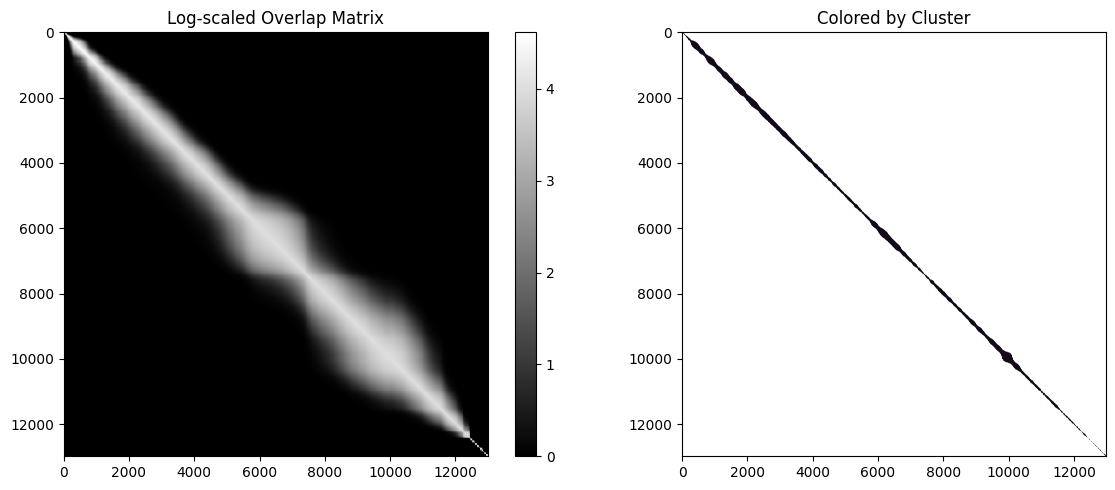

In [ ]:
clusterMapping2 = df2['cluster'].values
# Setting up a figure with 2 subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Apply a logarithmic transformation to the overlapMatrix
log_overlapMatrix2 = np.log(overlapMatrix2 + 1)  # Adding 1 to avoid log(0)

# Plotting the log-transformed overlapMatrix on the first subplot
im1 = axes[0].imshow(log_overlapMatrix2, cmap='gray')
axes[0].set_title('Log-scaled Overlap Matrix')
fig.colorbar(im1, ax=axes[0])

# Get the cluster color palette
palette = sns.color_palette('cubehelix', 17)
colors = {i: palette[i] for i in range(17)}

# Create a color matrix initialized with ones (white color)
colorMatrix2 = np.ones(overlapMatrix2.shape + (3,))

# Apply colors based on clusters and overlap percentage
for i, cluster_id in enumerate(clusterMapping2):
    for j in range(overlapMatrix2.shape[1]):
        if overlapMatrix2[i, j] >= 50:
            colorMatrix2[i, j] = colors[cluster_id]

# Plotting the colorMatrix on the second subplot
axes[1].imshow(colorMatrix2)
axes[1].set_title('Colored by Cluster')

plt.tight_layout()
plt.show()

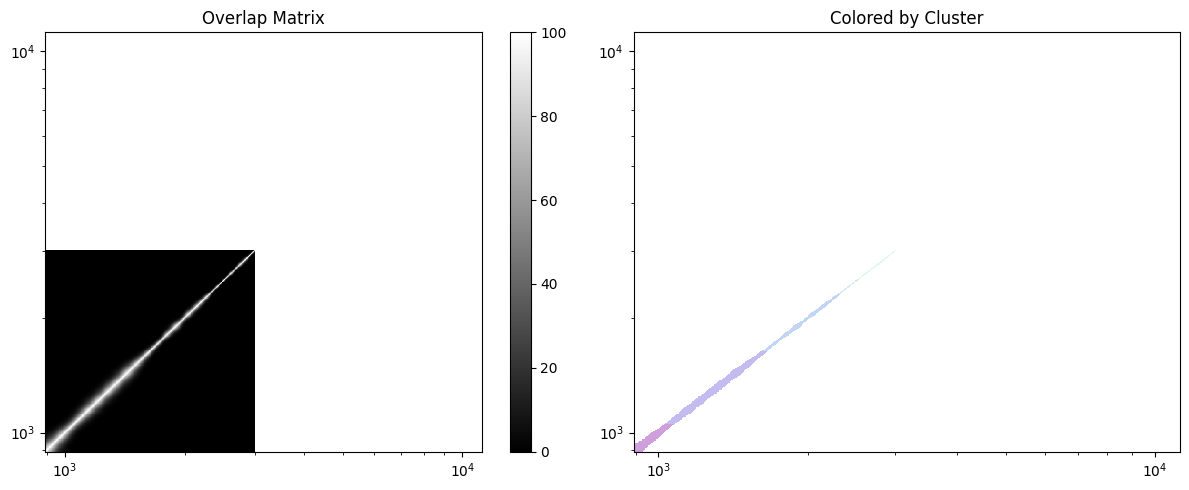

In [ ]:
def plot_overlap_and_clusters(overlapMatrix, df, log_scale=False):
    """
    Plots the overlap matrix and a color matrix based on cluster mapping side by side.

    Parameters:
    - overlapMatrix (numpy.ndarray): A 2D array representing the overlap percentages.
    - df (pd.DataFrame): DataFrame that contains a 'cluster' column mapping each observation in overlapMatrix to a cluster.
    - log_scale (bool): If True, axes are displayed in logarithmic scale.

    Returns:
    None. Displays the plots.
    """

    clusterMapping = df['cluster'].values

    # Create coordinate grids for pcolormesh
    x = np.arange(overlapMatrix.shape[1] + 1)
    y = np.arange(overlapMatrix.shape[0] + 1)

    # Setting up a figure with 2 subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Plotting the overlapMatrix on the first subplot
    c1 = axes[0].pcolormesh(x, y, overlapMatrix, cmap='gray', shading='auto')
    axes[0].set_title('Overlap Matrix')
    fig.colorbar(c1, ax=axes[0])

    if log_scale:
        axes[0].set_xscale('log')
        axes[0].set_yscale('log')

    # Get the cluster color palette
    palette = sns.color_palette('cubehelix', 17)
    colors = {i: palette[i] for i in range(17)}

    # Create a color matrix initialized with ones (white color)
    colorMatrix = np.ones(overlapMatrix.shape + (3,))

    # Apply colors based on clusters and overlap percentage
    for i, cluster_id in enumerate(clusterMapping):
        for j in range(overlapMatrix.shape[1]):
            if overlapMatrix[i, j] >= 50:
                colorMatrix[i, j] = colors[cluster_id]

    # Plotting the colorMatrix on the second subplot
    c2 = axes[1].pcolormesh(x, y, np.sum(colorMatrix * [0.2989, 0.5870, 0.1140], axis=-1), cmap='cubehelix', shading='auto')
    axes[1].set_title('Colored by Cluster')

    if log_scale:
        axes[1].set_xscale('log')
        axes[1].set_yscale('log')

    plt.tight_layout()
    plt.show()

    return colorMatrix
# Sample usage
colorMatrix = plot_overlap_and_clusters(overlapMatrix1, df1, log_scale=True)

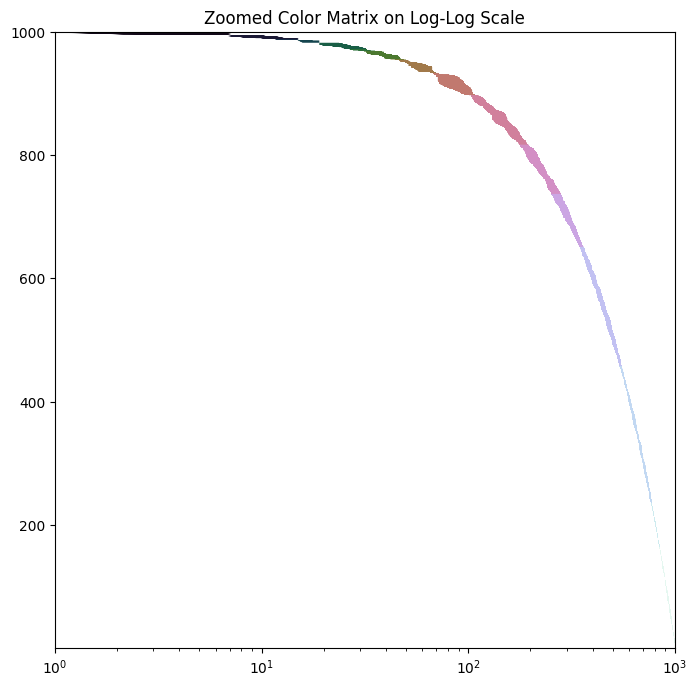

In [ ]:
# Zoom into the colorMatrix for the first 1000 rows and columns
zoomed_colorMatrix = colorMatrix[:3014 , :3014]
# Get the extent of the data
extent = [1, 1000, 1, 1000]
# Plotting the zoomed colorMatrix
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(zoomed_colorMatrix, aspect='auto', extent=extent)
ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_title('Zoomed Color Matrix on Log-Log Scale')
plt.show()

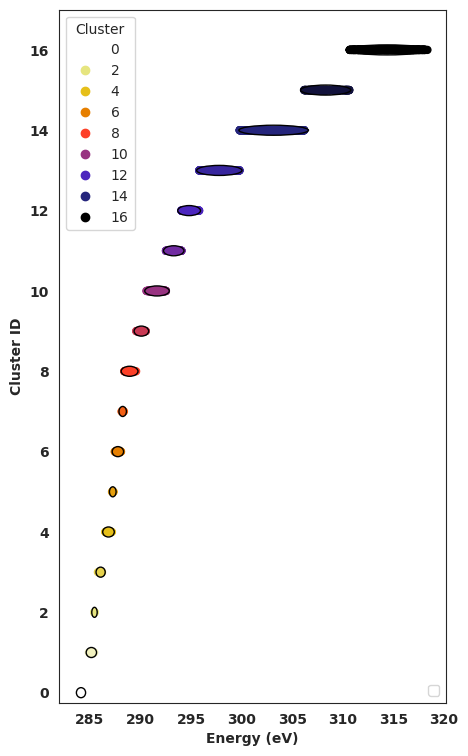

In [ ]:
# Create the scatter plot
plt.figure(figsize=(5,9))
sns.set_style('white')
# Set the point size
point_size = 25

# Create the scatter plot with colored points based on label and custom point size
scatter = plt.scatter(df['energy'], df['cluster'], s=point_size, c=df['cluster'], cmap='CMRmap_r')

# Draw circles around data points with the same label
for label in df['cluster'].unique():
    label_data = df[df['cluster'] == label]
    center = (label_data['energy'].mean(), label_data['cluster'].mean())
    width = label_data['energy'].max() - label_data['energy'].min() + 0.5
    height = label_data['cluster'].max() - label_data['cluster'].min() + 0.25

    # Draw an ellipse around the data points
    ellipse = Ellipse(xy=center, width=width, height=height, edgecolor='black', facecolor='none')
    plt.gca().add_patch(ellipse)

# Customize tick labels and axis labels
plt.yticks(ticks=plt.yticks()[0], labels=[f'{int(y):d}' for y in plt.yticks()[0]], fontweight='bold')
plt.xticks(fontweight='bold')
plt.xlabel('Energy (eV)', fontweight='bold')
plt.ylabel('Cluster ID', fontweight='bold')

# Set the y-axis range
plt.ylim(-0.25, 17)


# Get unique colors used in the scatter plot
legend_elements = plt.legend(*scatter.legend_elements(), title='Cluster')
plt.gca().add_artist(legend_elements)
plt.legend(loc='lower right')

# Show the plot
plt.show()

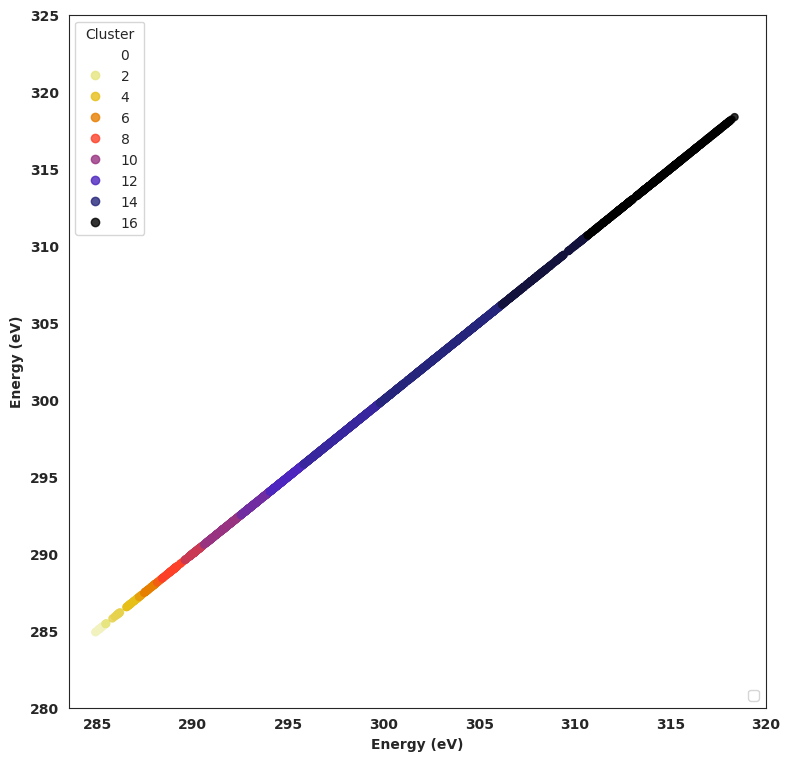

In [ ]:
# Create the scatter plot
plt.figure(figsize=(9,9))
sns.set_style('white')
# Set the point size
point_size = 25

# Create the scatter plot with colored points based on label and custom point size
scatter = plt.scatter(df['energy'], df['energy'], s=point_size, c=df['cluster'], cmap='CMRmap_r', alpha=0.8)

# Draw circles around data points with the same label
for label in df['cluster'].unique():
    label_data = df[df['energy'] == label]
    center = (label_data['energy'].mean(), label_data['energy'].mean())
    width = label_data['energy'].max() - label_data['energy'].min() + 0.5
    height = label_data['energy'].max() - label_data['energy'].min() + 0.25

    # Draw an ellipse around the data points
    ellipse = Ellipse(xy=center, width=width, height=height, edgecolor='black', facecolor='none')
    plt.gca().add_patch(ellipse)

# Customize tick labels and axis labels
plt.yticks(ticks=plt.yticks()[0], labels=[f'{int(y):d}' for y in plt.yticks()[0]], fontweight='bold')
plt.xticks(ticks=plt.xticks()[0], labels=[f'{int(y):d}' for y in plt.xticks()[0]], fontweight='bold')
plt.xlabel('Energy (eV)', fontweight='bold')
plt.ylabel('Energy (eV)', fontweight='bold')

# Set the y-axis range
plt.xlim(283.5, 320)
#plt.yscale('log')  # Set y-axis scale to logarithmic
#plt.xscale('log')  # Set x-axis scale to logarithmic

# Get unique colors used in the scatter plot
legend_elements = plt.legend(*scatter.legend_elements(), title='Cluster')
plt.gca().add_artist(legend_elements)
plt.legend(loc='lower right')

# Show the plot
plt.show()

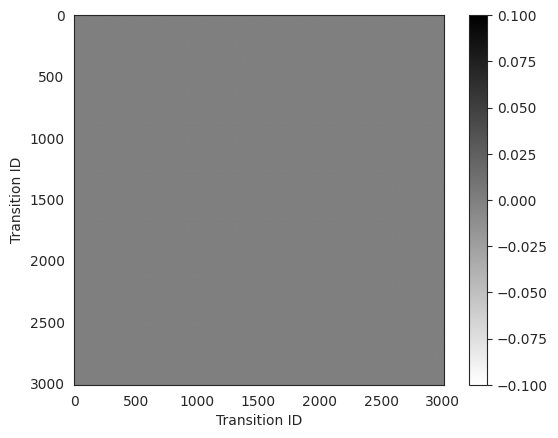

In [ ]:
nt = df.shape[0]
grid = np.zeros((nt, nt))

# Plot the grid
plt.imshow(grid, cmap='binary')
plt.colorbar()

# Customize tick labels and axis labels
#plt.xticks(range(nt))
#plt.yticks(range(nt))
plt.xlabel('Transition ID')
plt.ylabel('Transition ID')

# Show the plot
plt.show()

In [ ]:
# Filter the DataFrame based on the column value
filtered_df = df[df['cluster'] == 0]
filtered_df

,energy,os,wid,mu_x,mu_y,mu_z,theta,sym,xx,yy,zz,xy,xz,yz,atom,mo,cluster
0,283.88672,0.002326,0.254777,0.007556,0.007556,0.999943,0.612298,1,1.330000e-07,1.330000e-07,0.002326,0,0,0,7,117,0
1,283.96484,0.002679,0.254777,0.013301,0.013301,0.999823,1.077745,1,4.740000e-07,4.740000e-07,0.002678,0,0,0,10,117,0
2,283.98047,0.002534,0.254777,0.019405,0.019405,0.999623,1.572590,1,9.540000e-07,9.540000e-07,0.002532,0,0,0,2,117,0
3,284.03125,0.002780,0.254777,0.007760,0.007760,0.999940,0.628696,1,1.670000e-07,1.670000e-07,0.002780,0,0,0,15,117,0
4,284.05859,0.002178,0.254777,0.017259,0.017259,0.999702,1.398578,1,6.490000e-07,6.490000e-07,0.002177,0,0,0,5,117,0
5,284.07031,0.002887,0.254777,0.003355,0.003355,0.999989,0.271962,1,3.250000e-08,3.250000e-08,0.002887,0,0,0,13,117,0
6,284.07812,0.000827,0.254777,0.014369,0.014369,0.999794,1.164325,1,1.710000e-07,1.710000e-07,0.000826,0,0,0,6,117,0
7,284.07812,0.002297,0.254777,0.021526,0.021526,0.999537,1.744506,1,1.060000e-06,1.060000e-06,0.002295,0,0,0,4,117,0
8,284.11328,0.001306,0.254777,0.005622,0.005622,0.999968,0.455425,1,4.130000e-08,4.130000e-08,0.001305,0,0,0,11,117,0
9,284.12500,0.000858,0.254777,0.005075,0.005075,0.999974,0.411169,1,2.210000e-08,2.210000e-08,0.000858,0,0,0,3,117,0


In [ ]:
# Get the index of a specific row
row_index = df.index[2]  # Index of the third row (index starts from 0)
print(row_index)

2


Populating Grid: 100%|██████████| 9084196/9084196 [01:16<00:00, 118737.57it/s]


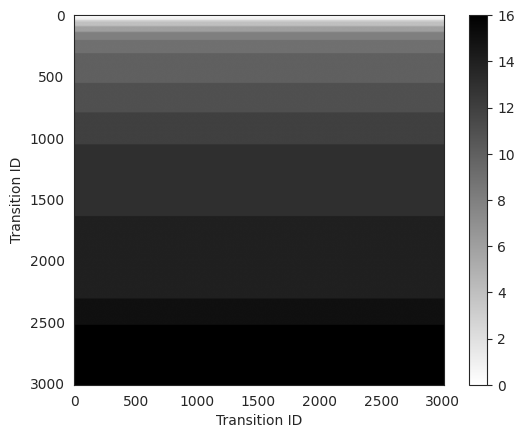

In [ ]:
nt = df.shape[0]
grid = np.zeros((nt, nt))

# Create a progress bar using tqdm
progress_bar = tqdm(total=nt * nt, desc='Populating Grid')

# Iterate over the elements using nested loops
for row_idx, row in enumerate(grid):
    for col_idx, _ in enumerate(row):
        # Assign value from 'cluster' column to the grid
        grid[row_idx][col_idx] = df['cluster'][row_idx]

        # Update the progress bar
        progress_bar.update(1)

# Close the progress bar
progress_bar.close()

# Plot the grid
plt.imshow(grid, cmap='binary')
plt.colorbar()

# Add axis labels
plt.xlabel('Transition ID')
plt.ylabel('Transition ID')

# Show the plot
plt.show()

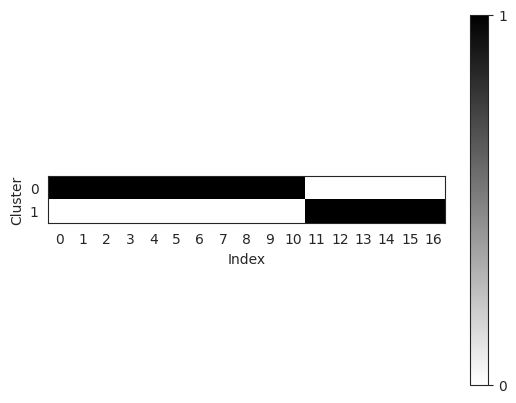

In [ ]:
# Define the number of elements and clusters
num_elements = 17
num_clusters = 2

# Create an empty 2D matrix
matrix = np.zeros((num_elements, num_clusters))

# Assign elements to clusters
matrix[0:11, 0] = 1  # Elements 0-10 belong to cluster 0
matrix[11:17, 1] = 1  # Elements 11-16 belong to cluster 1
# Create a heatmap using Matplotlib
plt.imshow(matrix.T, cmap='binary')
plt.xticks(range(len(matrix)))
plt.xlabel('Index')
plt.yticks(range(2))
plt.ylabel('Cluster')
plt.colorbar(ticks=[0, 1])

# Show the plot
plt.show()

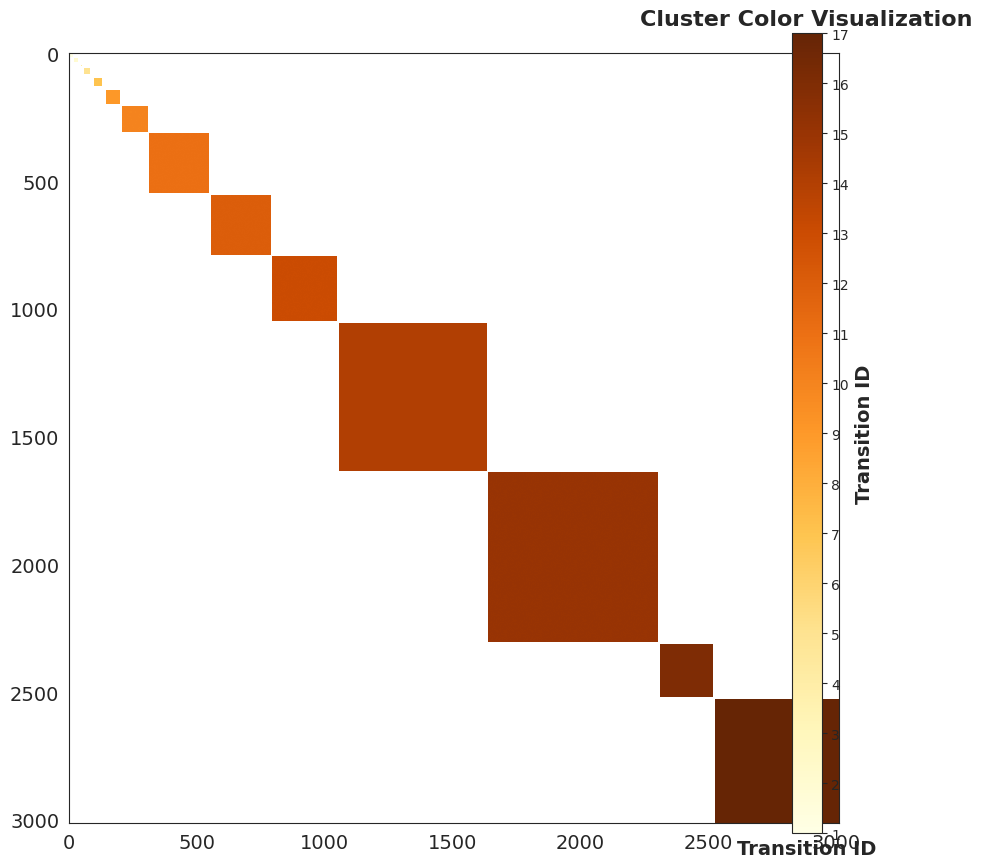

In [ ]:
# Get the number of transitions and clusters
transitions = df.shape[0]
nclusters = df['cluster'].nunique()

# Create an empty array for colors
color_array = np.full((transitions, transitions), np.nan)

for cluster in range(nclusters):
    filtered_df = df[df['cluster'] == cluster]

    # Get the minimum and maximum index values
    min_index = filtered_df.index.min()
    max_index = filtered_df.index.max()

    # Assign color to elements within the cluster
    color = cluster + 1
    color_array[min_index:max_index + 1, min_index:max_index + 1] = color

# Create a new figure with a larger size
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the color array
im = ax.imshow(color_array, cmap='YlOrBr', vmin=1, vmax=nclusters)

# Add colorbar inside the plot
cax = fig.add_axes([0.85, 0.1, 0.03, 0.8])  # [left, bottom, width, height]
cbar = fig.colorbar(im, cax=cax, ticks=range(1, nclusters+1))
cbar.set_label('Cluster ID', fontsize=14, fontweight='bold')

# Set font size and weight for x and y tick labels
# Set font size and weight for x and y tick labels
ax.tick_params(axis='both', labelsize=14)
ax.tick_params(axis='both', which='major', width=1.5)
plt.xlabel('Transition ID', fontsize=14, fontweight='bold')
plt.ylabel('Transition ID', fontsize=14, fontweight='bold')
plt.title('Cluster Color Visualization', fontsize=16, fontweight='bold')
plt.show()

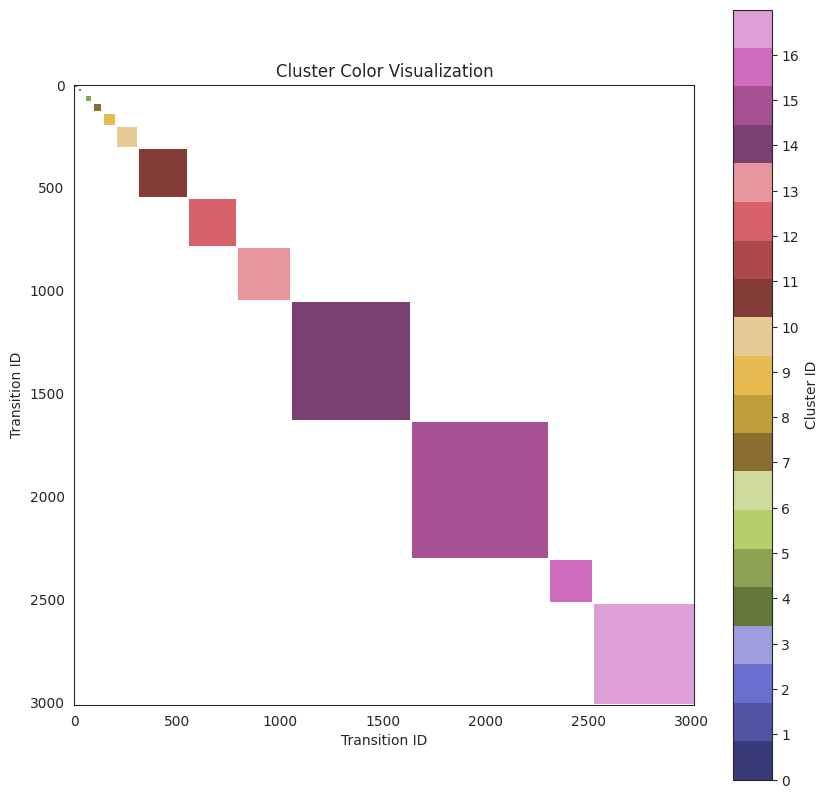

In [ ]:
# Plot the color array
plt.figure(figsize=(10, 10))
plt.imshow(color_array, cmap='tab20b', vmin=0, vmax=nclusters)
plt.colorbar(ticks=range(0, nclusters), label='Cluster ID')
plt.xlabel('Transition ID')
plt.ylabel('Transition ID')
plt.title('Cluster Color Visualization')
plt.show()

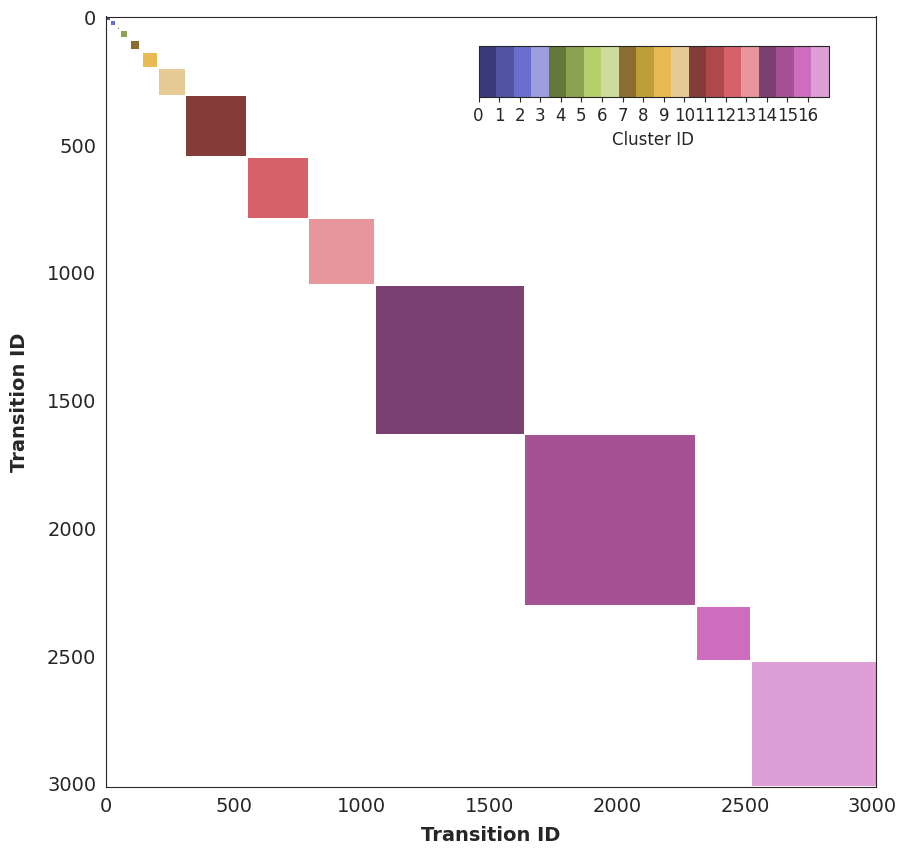

In [ ]:
# Create a new figure with a larger size
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the color array
im = ax.imshow(color_array, cmap='tab20b', vmin=0, vmax=nclusters)

# Add colorbar as a legend in the top right corner
cax = fig.add_axes([0.50, 0.8, 0.35, 0.05])  # [left, bottom, width, height]
cbar = fig.colorbar(im, cax=cax, ticks=range(0, nclusters), orientation='horizontal')
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Cluster ID', fontsize=12)

# Set font size and weight for x and y tick labels
ax.tick_params(axis='both', labelsize=14, width=1.5)
ax.set_xlabel('Transition ID', fontsize=14, fontweight='bold')
ax.set_ylabel('Transition ID', fontsize=14, fontweight='bold')

# Center the axis labels
ax.xaxis.set_label_coords(0.5, -0.05)
ax.yaxis.set_label_coords(-0.1, 0.5)

plt.show()